## Tables of Content

#### Linear Algebra Tools

1. Operator Matrices
    - Pauli: I, X, Y, Z
    - Hadamard: H
    - Phase: P
    - Sqrt(X): SX
    - Sqrt(Z): S
    - Sqrt(H): SH
    - 4rt (Z): T
    - X root: Xrt(s)
    - H root: Hrt(s)
    - Rotation Matrices: Rx($\theta$), Ry($\theta$), Rz($\theta$)
    - U3 Matrix: U3($\theta, \phi, \lambda$)
    - Controlled-Not: CX
    
</br>

2. Common Statevectors
    - $|0\rangle$: zero
    - $|1\rangle$: one
    - $|+\rangle$: plus
    - $|-\rangle$: minus
    - $| \uparrow \rangle$: up
    - $| \downarrow \rangle$: down
    - Bell States: B00, B01, B10, B11
  
</br>

3. Lambda Methods
    - ndarray to list: to_list(array)
    - tensor: *****initial_state
    - matmul: *****initial_state
    
</br>
    
4. Full Methods
    - Calculate Hermitian Conjugate: dagger(mat)
    - Build CU matrix: cu_matrix(no_qubits, control, target, U, little_edian)
    - Find RX, RY for arbitrary U3: angles_from_state_vectors(output_statevector)
    
</br>

5. Visualizations
    - view(mat, rounding = 10)


#### Qiskit Tools

1. Linear Algebra
    - Short-hand QC: q(*****regs, name=None, global_phase=0)
    - Multi-controlled Unitary: control_unitary(circ, unitary, *****controls, target)
    - Control Phase: control_phase(circ, angle, control_bit, target_bit, recip=True, pi_on=True)

</br>

2. Visualizations
    - Draw Circuit: milk(circ)
    - Draw Transpiled Circuit: dtp(circ, print_details = True, visual = True, return_values = False)
    - Get Unitary / Statevector Function: get(circ, types = 'unitary', nice = True)
    - Displaying Histogram / Bloch / Counts: sim(circ, visual = 'hist')
    
</br>

3. Toffoli Optimizaton Specific
    - Unitary Checker: unitary_check(test_unitary)
    - Multi-Hadamard Composition: h_relief(n, no_h)

### Import

In [1]:
import numpy as np
import sympy
from sympy import *
from sympy.solvers.solveset import linsolve

import matplotlib
import matplotlib.pyplot as plt 
matplotlib.use('Agg')

from sympy import Matrix, init_printing

import qiskit
from qiskit import *
from qiskit import QuantumCircuit as q
from qiskit.aqua.circuits import *

# Representing Data
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator
from qiskit.tools.visualization import plot_histogram, plot_state_city, plot_bloch_multivector

# Monitor Job on Real Machine
from qiskit.tools.monitor import job_monitor

from functools import reduce # perform sucessive tensor product

# Calculating cost
from sklearn.metrics import mean_squared_error

# Generating random unitary matrix
from scipy.stats import unitary_group

# Measure run time
import time

# Almost Equal
from numpy.testing import assert_almost_equal as aae

Duplicate key in file '/Users/minhpham/.matplotlib/matplotlibrc', line 2 ('backend: TkAgg')
Duplicate key in file '/Users/minhpham/.matplotlib/matplotlibrc', line 3 ('backend: TkAgg')


### Linear Algebra Tools

In [2]:
# Matrices
I = np.array([[1, 0], [0, 1]])
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
H = 1/np.sqrt(2)*np.array([[1, 1], [1, -1]])
P = lambda theta: np.array([[1, 0], [0, np.exp(1j*theta)]])

# sqrt(X)
SX = 1/2 * np.array([[1+1j, 1-1j], [1-1j, 1+1j]])

# sqrt(Z)
S = np.array([[1, 0], [0, 1j]])

# sqrt(H)
SH = (1j/4-1/4)*np.array([[np.sqrt(2) + 2j, np.sqrt(2)], [np.sqrt(2), -np.sqrt(2)+2j]])

# 4th root of Z
T = np.array([[1, 0], [0, 1/np.sqrt(2) + 1/np.sqrt(2)*1j]])

# X power
Xp = lambda t: 1/2 * np.array([[1, 1], [1, 1]]) + np.exp(1j*np.pi*t)/(2) * np.array([[1, -1], [-1, 1]])

# H power
Hp = lambda t: np.exp(-1j*np.pi*t/2) * np.array([[np.cos(np.pi*t/2) + 1j/np.sqrt(2)* np.sin(np.pi*t/2), 1j/np.sqrt(2) * np.sin(np.pi*t/2)], 
                                                   [1j/np.sqrt(2) * np.sin(np.pi*t/2), np.cos(np.pi*t/2)-1j/np.sqrt(2)* np.sin(np.pi*t/2)]])

CX = np.array([[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]])

# Rn Matrix Function
Rx = lambda theta: np.array([[np.cos(theta/2), -1j*np.sin(theta/2)], [-1j*np.sin(theta/2), np.cos(theta/2)]])
Ry = lambda theta: np.array([[np.cos(theta/2), -np.sin(theta/2)], [np.sin(theta/2), np.cos(theta/2)]])
Rz = lambda theta: np.array([[np.exp(-1j*theta/2), 0], [0, np.exp(1j*theta/2)]])

# U3 Matrix
U3 = lambda theta, phi, lam: np.array([[np.cos(theta/2), -np.exp(1j*lam)*np.sin(theta/2)], 
                                       [np.exp(1j*phi)*np.sin(theta/2), np.exp(1j*lam + 1j*phi)*np.cos(theta/2)]])

# Eigenvectors of Pauli Matrices
zero = np.array([[1], [0]]) # Z plus basis state
one = np.array([[0], [1]]) # Z plus basis state

plus = np.array([[1], [1]])/np.sqrt(2) # X plus basis state
minus = np.array([[1], [-1]])/np.sqrt(2) # X minus basis state

up = np.array([[1], [1j]])/np.sqrt(2) # Y plus basis state
down = np.array([[1], [-1j]])/np.sqrt(2) # Y plus basis state

# Bell States
B00 = np.array([[1], [0], [0], [1]])/np.sqrt(2) # Bell of 00
B01 = np.array([[1], [0], [0], [-1]])/np.sqrt(2) # Bell of 01
B10 = np.array([[0], [1], [1], [0]])/np.sqrt(2) # Bell of 10
B11 = np.array([[0], [-1], [1], [0]])/np.sqrt(2) # Bell of 11

# ndarray to list
to_list = lambda array: list(np.squeeze(array))

# Tensor Product of 2+ matrices/ vectors
tensor = lambda *initial_state: reduce(lambda x, y: np.kron(x, y), initial_state)

# Matrix Multiplicaton of 2+ matrices / vectors
mat_mul = lambda *initial_state: reduce(lambda x, y: np.dot(x, y), initial_state)

###### Calculate Hermitian Conjugate

In [3]:
def dagger(mat):
    
    # Calculate Hermitian conjugate
    mat_dagger = np.conj(mat.T)
    
    '''# Assert Hermitian identity
    aae(np.dot(mat_dagger, mat), np.identity(mat.shape[0]))'''
    
    return mat_dagger

###### CU Matrix

In [4]:
def cu_matrix(no_qubits, control, target, U, little_edian = True):
    
    """
    Manually build the unitary matrix for non-adjacent CX gates
    
    Parameters:
    -----------
    no_qubits: int
        Number of qubits in the circuit
    control: int
        Index of the control qubit (1st qubit is index 0)
    target: int
        Index of the target qubit (1st qubit is index 0)
    U: ndarraych
        Target unitary matrix
    edian: bool (True: qiskit convention)
        Qubits order convention
        
    Returns:
    --------
    cx_out:
        Unitary matrix for CU gate
    """
    
    left = [I]*no_qubits
    right = [I]*no_qubits
    
    left[control] = np.dot(zero, zero.T)
    right[control] = np.dot(one, one.T)

    right[target] = U

    if little_edian:
        cx_out = tensor(*reversed(left)) + tensor(*reversed(right))
    else:
        cx_out = tensor(*left) + tensor(*right)
    
    # This returns a unitary in qiskit 'little eddian', to switch back, simply switch the target for control
          
    return cx_out

###### Angles from Statevector

In [5]:
def angles_from_statevectors(output_statevector):
    
    """
    Calculate correct x, y rotation angles from an arbitrary output statevector
    
    Paramters:
    ----------
    output_statevector: ndarray
        Desired output state
        
    Returns:
    --------
    phi: float
        Angle to rotate about the y-axis [0, 2pi)
    theta: float
        Angle to rotate about the x-axis [0, 2pi)
    
    """
    
    # Extract the components
    x, z = output_statevector.real
    y, w = output_statevector.imag
    
    # Calculate the correct angles
    phi = 2*np.arctan2(z,x)[0]
    theta = 2*np.arctan2(y,z)[0]
    
    print(f'phi: {phi}')
    print(f'theta: {theta}')
    
    return phi, theta

###### View Matrix

In [6]:
def view(mat, rounding = 10):
    display(Matrix(np.round(mat, rounding)))

### Qiskit Tools

###### Controlled Unitary

In [7]:
def control_unitary(circ, unitary, controls, target):
    
    """
    Composed a multi-controlled single unitary target gate
    
    Parameters:
    -----------
    circ: QuantumCircuit
        Qiskit circuit of appropriate size, no less qubit than the size of the controlled gate
    unitary: ndarray of (2, 2)
        Unitary operator for the target qubit
    controls: list
        Indices of controlled qubit on the original circuit
    target: int
        Index of target bit
    
    
    Returns:
    --------
    new_circ: QuantumCircuit
        Composed circuit with unitary target
    """

    # Get info about circuit parameters
    
    no_controls = len(controls)
    unitary_size = np.log2(len(unitary))


    # Build unitary circuit

    qc = QuantumCircuit(unitary_size)
    qc.unitary(unitary, range(int(unitary_size)))
    qc = qc.control(no_controls)

    # Composed the control part in the circuit

    new_circ = circ.compose(qc, (*controls, target))
    
    return new_circ

##### Controlled Phase

In [8]:
def control_phase(circ, angle, control_bit, target_bit, recip = True, pi_on = True):
    
    """
    Add a controlled-phase gate
    
    Parameters:
    -----------
    circ: QuantumCircuit
        Inputted circuit
        
    angle: float
        Phase Angle
    
    control_bit: int
        Index of control bit
    
    target_bit: int
        Index of target bit
        
    recip: bool (True)
        Take the reciprocal of the angle
        
    pi_on: bool (True)
        Multiply pi to the angle
        
    Returns:
    --------
    circ: QuantumCircuit
        Circuit with built-in CP
    
    """
    
    if recip:
        angle = 1/angle
    if pi_on:
        angle *=np.pi
        
    
    circ.cp(angle, control_bit, target_bit)
    
    return circ

###### Draw Circuit

In [9]:
def milk(circ):
    return circ.draw('mpl')

###### Draw Transpiled Circuit

In [10]:
def dtp(circ, print_details = True, nice = True, return_values = False):
    
    """
    Draw and/or return information about the transpiled circuit
    
    Parameters:
    -----------
    circ: QuantumCircuit
        QuantumCircuit to br transpiled
    print_details: bool (True)
        Print the number of u3 and cx gates used
    nice: bool (True)
        Show the transpiled circuit
    return_values: bool (True)
        Return the number of u3 and cx gates used
        
    Returns:
    --------
    no_cx: int
        Number of cx gates used
    no_u3: int
        Number of u3 gates used
    
    """
    
    # Transpile Circuit
    circ = transpile(circ, basis_gates= ['u3', 'cx'], optimization_level=3)

    # Count operations
    gates = circ.count_ops()

    # Compute cost
    try:
        no_u3 = gates['u3']
    except:
        no_u3 = 0
        
    try:
        no_cx = gates['cx']
    except:
        no_cx = 0
    
    cost = no_u3 + 10*no_cx

    if print_details:
        # Print Circuit Details
        print(f'cx: {no_cx}')

        print(f'u3: {no_u3}')
        print(f'Total cost: {cost}')
    
    if nice:
        return circ.draw('mpl')
    
    if return_values:
        return no_cx, no_u3

###### Get Unitary/StateVector Function

In [11]:
def get(circ, types = 'unitary', nice = True):
    
    """
    This function return the statevector or the unitary of the inputted circuit
    
    Parameters:
    -----------
    circ: QuantumCircuit
        Inputted circuit without measurement gate
    types: str ('unitary')
        Get 'unitary' or 'statevector' option
    nice: bool
        Display the result nicely option or just return unitary/statevector as ndarray
        
    Returns:
    --------
    out: ndarray
        Outputted unitary of statevector
        
    """
    
    if types == 'statevector':
        backend = BasicAer.get_backend('statevector_simulator')
        out = execute(circ, backend).result().get_statevector()
    else: 
        backend = BasicAer.get_backend('unitary_simulator')
        out = execute(circ, backend).result().get_unitary()
        
    if nice:
        display(Matrix(np.round(out, 10))) 
    else:
        return out

###### Displaying Histogram / Bloch / Counts

In [12]:
def sim(circ, visual = 'hist'):
    
    """
    Displaying output of quantum circuit
    
    Parameters:
    -----------
    circ: QuantumCircuit
        QuantumCircuit with or without measurement gates
    visual: str ('hist')
        'hist' (counts on histogram) or 'bloch' (statevectors on Bloch sphere) or None (get counts only)
        
    Returns:
    --------
    counts: dict
        Counts of each CBS state
    """
    
    # Simulate circuit and display counts on a histogram
    if visual == 'hist':
        simulator = Aer.get_backend('qasm_simulator')
        results = execute(circ, simulator).result()
        counts = results.get_counts(circ)
        plot_histogram(counts)
        
        return counts
        
    # Get the statevector and display on a Bloch sphere
    elif visual == 'bloch':
        backend = BasicAer.get_backend('statevector_simulator')
        statevector = execute(circ, backend).result().get_statevector()
        get(circ)
        plot_bloch_multivector(statevector)
        
    # Just get counts
    else:
        simulator = Aer.get_backend('qasm_simulator')
        results = execute(circ, simulator).result()
        counts = results.get_counts(circ)
        
        return counts

###### Unitary Checker

In [13]:
def cx_check(test_unitary, perfect = False):
    
    """
    Check if the CnX unitary is correct
    
    Parameters:
    -----------
    test_unitary: ndarray
        Unitary generated by the circuit
    perfect: ndarray
        Account for phase difference
        
    """
    
    # Get length of unitary
    if not perfect:
        test_unitary = np.abs(test_unitary)
        
    size = test_unitary.shape[0]
    
    cx_theory = np.identity(size)

    # Change all the difference
    cx_theory[int(size/2) - 1, size - 1] = 1
    cx_theory[size - 1, int(size/2) - 1] = 1
    cx_theory[int(size/2) -1, int(size/2) -1] = 0
    cx_theory[size - 1, size - 1] = 0

    # Assert Similarity
    aae(cx_theory, test_unitary)
    
    print('Unitary is correct')

###### CnX/CnP (Multiple-controlled Not modulo phase shift circuit)

In [14]:
def CnX(n, control_list = None, target = None, circ = None, theta = 1):
    
    # Build New Circuit
    if circ == None:
        circ = q(n+1)
        control_list = list(range(n))
        target = n
    
    # Base Case
    if n == 1:
        
        circ.cx(*control_list, target)
        
        return circ
    
    if n==2:
        circ.ch(control_list[0], target)
        circ.cz(control_list[1], target)
        circ.ch(control_list[0], target)
        
        return circ
    
    if n == 3:
        circ.rcccx(*control_list, target)
        
        return circ
    
    # New Case
    
    # CH
    circ.ch(control_list[0], target)
    
    # CP2
    circ = control_phase(circ, theta*2, control_list[-1], target)
    
    # C(n-2)X
    circ = CnX(n-2, control_list[1:-1], control_list[-1], circ)
    
    # -CP2
    circ = control_phase(circ, -theta*2, control_list[-1], target)
    
    # C(n-2)X
    circ = CnX(n-2, control_list[1:-1], control_list[-1], circ)
    
    # CnP
    circ = CnP(n-2, control_list[1:-1], target, circ, theta*2)
    
    # CH
    circ.ch(control_list[0], target)
    
    return circ

def CnP(n, control_list = None, target = None, circ = None, theta = 1):
    
    # Build New Circuit
    if circ == None:
        circ = q(n+1)
        control_list = list(range(n))
        target = n
    
    # Base Case
    if n ==1:
        circ = control_phase(circ, theta, control_list, target)
        
        return circ 
    
    # New Case
    
    # CP
    circ = control_phase(circ, theta*2, control_list[-1], target)
    
    # C(n-1)X
    circ = CnX(n-1, control_list[:-1], control_list[-1], circ)
    
    # -CP
    circ = control_phase(circ, -theta*2, control_list[-1], target)
    
    # C(n-1)X
    circ = CnX(n-1, control_list[:-1], control_list[-1], circ)
    
    # C(n-1)P
    circ = CnP(n-1, control_list[:-1], target, circ, theta*2)
    
    return circ

###### CnH / Multi-Hadamard Composition

In [18]:
def CnH(n, control_list = None, target = None, circ = None, theta = 1):
    
    # Build New Circuit
    if circ == None:
        circ = q(n+1)
        control_list = list(range(n))
        target = n
    
    # Base Case
    
    if n ==1 and theta ==1:
        circ.ch(control_list, target)
        
        return circ
    
    if n ==1:
        circ.unitary(cu_matrix(2, 0, 1, Hp(1/theta)), [control_list, target])
        
        return circ 
    
    # New Case
    
    # CH
    circ.unitary(cu_matrix(2, 0, 1, Hp(1/(theta*2))), [control_list[-1], target])
    
    # C(n-1)X
    circ = CnX(n-1, control_list[:-1], control_list[-1], circ)
    
    # CH
    circ.unitary(cu_matrix(2, 0, 1, Hp(-1/(theta*2))), [control_list[-1], target])
    
    # C(n-1)X
    circ = CnX(n-1, control_list[:-1], control_list[-1], circ)
    
    # C(n-1)P
    circ = CnH(n-1, control_list[:-1], target, circ, theta*2)
    
    return circ

def h_relief(n, no_h, return_circ = False):
    
    # n is the number of control qubit
    # no_h is the number of control qubit on the side hadamard
    circ = q(n+1)
    circ= CnH(no_h, list(range(no_h)), n, circ)

    circ = CnP(n-no_h, list(range(no_h, n)), n, circ)
    circ= CnH(no_h, list(range(no_h)), n, circ)

    '''# Test for accuracy
    test = get(circ, nice = False)
    unitary_check(test)'''
    
    if return_circ:
        return circ
    
    dtp(circ, nice = False)

### Citations

### Background

Shende and Markov proved that the implementation of the $n$-qubit analogue of the $TOFFOLI$ requires at least $2n \ CNOT$ gates [1]. Currently, the best known upper bound is outlined by Maslov stands at $6n-12$ with the used of $\lceil \frac{n-3}{2} \rceil$ ancilla bits [2]. For implementaion without ancillae, we look at the technique outlined in Collorary 7.6 which has $\Theta(n^2)$ complexity [3].

In this notebook, we attempt to create a few examples of the $O(2n)$ lower bound without the use of ancilla. We will explore the plausibility of such task by analysing the following architecture. Note that in this notebook, $n$ qubits Toffli gates will simply be referred to as $CnX$ gate where $n$ is the number of control bits.

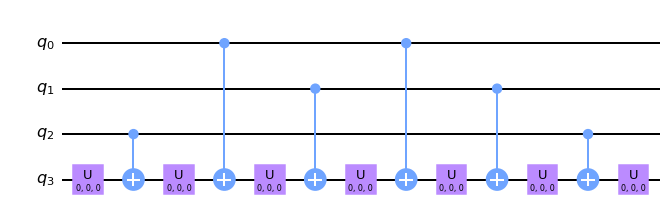

In [16]:
circ = q(4)
circ.u(0, 0, 0, 3)
circ.cx(2, 3)
circ.u(0, 0, 0, 3)
circ.cx(0, 3)
circ.u(0, 0, 0, 3)
circ.cx(1, 3)
circ.u(0, 0, 0, 3)
circ.cx(0, 3)
circ.u(0, 0, 0, 3)
circ.cx(1, 3)
circ.u(0, 0, 0, 3)
circ.cx(2, 3)
circ.u(0, 0, 0, 3)

milk(circ)

Note that the angle parameters of the unitary gates are not correct. The merely serves as a stand in for an arbitrary U3 gate. Our job is to determine the correct parameters for $\theta, \phi, \lambda$. But first, we must prove that this structure does indeed produce the output that we want. Let's work through some examples with small values of $n$ to get a better intution of how to prove this for larger values of $n$.

### Problem

For $n = 2$, assuming the above architecture is valid, determine the angles $\theta, \phi, \lambda$ for the three $U3$ matrices.

Plan
    
    1. Create a quantum circuit with the desired architecture

    2. Symbolically expand the q_1 unitary 

    3. Draw Neural Network graph

    4. Create data to train/test

    5. Initialized weights

    6. Implement Forward Propagation

    7. Define Cost function

    8. Implement Backpropagation

    9. Implement Gradient Descent to updates the weights in each layers
    
    10. Check that each layer is implemented correctly
    
    11. Train Model
    
    12. Evaluate Model
    
    13. Full Optimization Implementation

### Conventions

The unitary weights matrices can be organized in different configurations based on where the $X$ gates are placed. Let the constant $\gamma$ denote a specific configuration of X gates for an arbitrary circuit. At the moment, when we only have $2$ configurations. This parameter has little use. However, as the size of $CnX$ increases and the number of unitary increases, the number of configurations grows by $2^n$. In little edian form, we can denote the configurations of the unitary matrices with by the distribution of the X gates. Although we have not finalized a regular of the general circuit, we can still represent the $X$ gates configurations by the set of qubits that control them.

For example, we have the following circuit. And we want to represent the configuration where the $X$ gates controlled by $q_2 \ \& \ q_3$ are turned on.

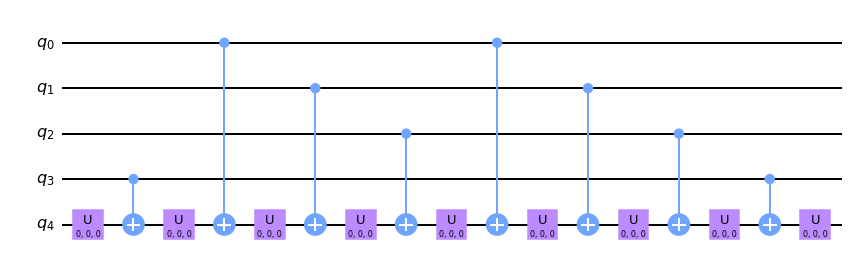

In [17]:
circ = q(5)

circ.u(0, 0, 0, 4)
circ.cx(3, 4)
circ.u(0, 0, 0, 4)
circ.cx(0, 4)
circ.u(0, 0, 0, 4)
circ.cx(1, 4)
circ.u(0, 0, 0, 4)
circ.cx(2, 4)
circ.u(0, 0, 0, 4)
circ.cx(0, 4)
circ.u(0, 0, 0, 4)
circ.cx(1, 4)
circ.u(0, 0, 0, 4)
circ.cx(2, 4)
circ.u(0, 0, 0, 4)
circ.cx(3, 4)
circ.u(0, 0, 0, 4)

milk(circ)

This can be acheived by passing in the input of $|1100\rangle$ to the first four qubits. Note that we are using the little edian convention here, so statevectors are in the form $|q_3, q_2, q_1, q_0 \rangle$. Thus this will be the value of $\gamma$ will be $|1100\rangle$ or $|12\rangle^4$ if one decides to write it in decimal form (the superscript 4 denotes the number of qubits). We can therefore represent the product of all the unitaries in a specific configuration with the $U_\gamma$. Continuing with the above circuit. If we count the unitaries alphabetically, then $A-X-BCD-X-EFG-X-H-X-I$ can be condensed into $U_{|1100\rangle}$.

### Step 1: Create Quantum Circuit

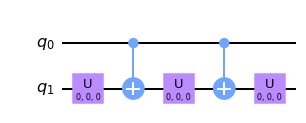

In [18]:
circ = q(2)
circ.u(0, 0, 0, 1)
circ.cx(0, 1)
circ.u(0, 0, 0, 1)
circ.cx(0, 1)
circ.u(0, 0, 0, 1)

milk(circ)

### Step 2: Expand q_1 Unitary

We symbolically expand $q_1$ unitary for when the $CX$ gate is on and off. This means that our unitary matrix will have dimension $(2, 2)$. This will be helpful when we calculate the partial derivative for gradient descent

In [19]:
# Symbols
theta_1, phi_1, lam_1 = symbols('theta_1, phi_1, lambda_1')
theta_2, phi_2, lam_2 = symbols('theta_2, phi_2, lambda_2')
theta_3, phi_3, lam_3 = symbols('theta_3, phi_3, lambda_3')

# U3 Matrices
U_1 = Matrix([[cos(theta_1/2), -exp(1j*lam_1)*sin(theta_1/2)], 
                                       [exp(1j*phi_1)*sin(theta_1/2), exp(1j*lam_1 + 1j*phi_1)*cos(theta_1/2)]])

U_2 = Matrix([[cos(theta_2/2), -exp(1j*lam_2)*sin(theta_2/2)], 
                                       [exp(1j*phi_2)*sin(theta_2/2), exp(1j*lam_2 + 1j*phi_2)*cos(theta_2/2)]])

U_3 = Matrix([[cos(theta_3/2), -exp(1j*lam_3)*sin(theta_3/2)], 
                                       [exp(1j*phi_3)*sin(theta_3/2), exp(1j*lam_3 + 1j*phi_3)*cos(theta_3/2)]])

#### CX Off (X gates not activated)

In [47]:
simplify(U_1*U_2*U_3)

Matrix([
[                                          -(exp(1.0*I*lambda_2)*sin(theta_2/2)*cos(theta_1/2) + exp(1.0*I*(lambda_1 + lambda_2 + phi_2))*sin(theta_1/2)*cos(theta_2/2))*exp(1.0*I*phi_3)*sin(theta_3/2) - (exp(1.0*I*(lambda_1 + phi_2))*sin(theta_1/2)*sin(theta_2/2) - cos(theta_1/2)*cos(theta_2/2))*cos(theta_3/2),                                            -(exp(1.0*I*lambda_2)*sin(theta_2/2)*cos(theta_1/2) + exp(1.0*I*(lambda_1 + lambda_2 + phi_2))*sin(theta_1/2)*cos(theta_2/2))*exp(1.0*I*(lambda_3 + phi_3))*cos(theta_3/2) + (exp(1.0*I*(lambda_1 + phi_2))*sin(theta_1/2)*sin(theta_2/2) - cos(theta_1/2)*cos(theta_2/2))*exp(1.0*I*lambda_3)*sin(theta_3/2)],
[(exp(1.0*I*phi_1)*sin(theta_1/2)*cos(theta_2/2) + exp(1.0*I*(lambda_1 + phi_1 + phi_2))*sin(theta_2/2)*cos(theta_1/2))*cos(theta_3/2) - (exp(1.0*I*(lambda_2 + phi_1))*sin(theta_1/2)*sin(theta_2/2) - exp(1.0*I*(lambda_1 + lambda_2 + phi_1 + phi_2))*cos(theta_1/2)*cos(theta_2/2))*exp(1.0*I*phi_3)*sin(theta_3/2), -(exp(1.0*I*phi_1)

#### CX On (X gates activated)

In [48]:
simplify(U_1*X*U_2*X*U_3)

Matrix([
[                                   -(exp(1.0*I*lambda_1)*sin(theta_1/2)*cos(theta_2/2) - exp(1.0*I*phi_2)*sin(theta_2/2)*cos(theta_1/2))*exp(1.0*I*phi_3)*sin(theta_3/2) + (exp(1.0*I*(lambda_1 + lambda_2))*sin(theta_1/2)*sin(theta_2/2) + exp(1.0*I*(lambda_2 + phi_2))*cos(theta_1/2)*cos(theta_2/2))*cos(theta_3/2),                                    -(exp(1.0*I*lambda_1)*sin(theta_1/2)*cos(theta_2/2) - exp(1.0*I*phi_2)*sin(theta_2/2)*cos(theta_1/2))*exp(1.0*I*(lambda_3 + phi_3))*cos(theta_3/2) - (exp(1.0*I*(lambda_1 + lambda_2))*sin(theta_1/2)*sin(theta_2/2) + exp(1.0*I*(lambda_2 + phi_2))*cos(theta_1/2)*cos(theta_2/2))*exp(1.0*I*lambda_3)*sin(theta_3/2)],
[(exp(1.0*I*(lambda_1 + phi_1))*cos(theta_1/2)*cos(theta_2/2) + exp(1.0*I*(phi_1 + phi_2))*sin(theta_1/2)*sin(theta_2/2))*exp(1.0*I*phi_3)*sin(theta_3/2) - (exp(1.0*I*(lambda_1 + lambda_2 + phi_1))*sin(theta_2/2)*cos(theta_1/2) - exp(1.0*I*(lambda_2 + phi_1 + phi_2))*sin(theta_1/2)*cos(theta_2/2))*cos(theta_3/2), (exp(1.0*I*(l

### Step 3: Visualizing Neural Network

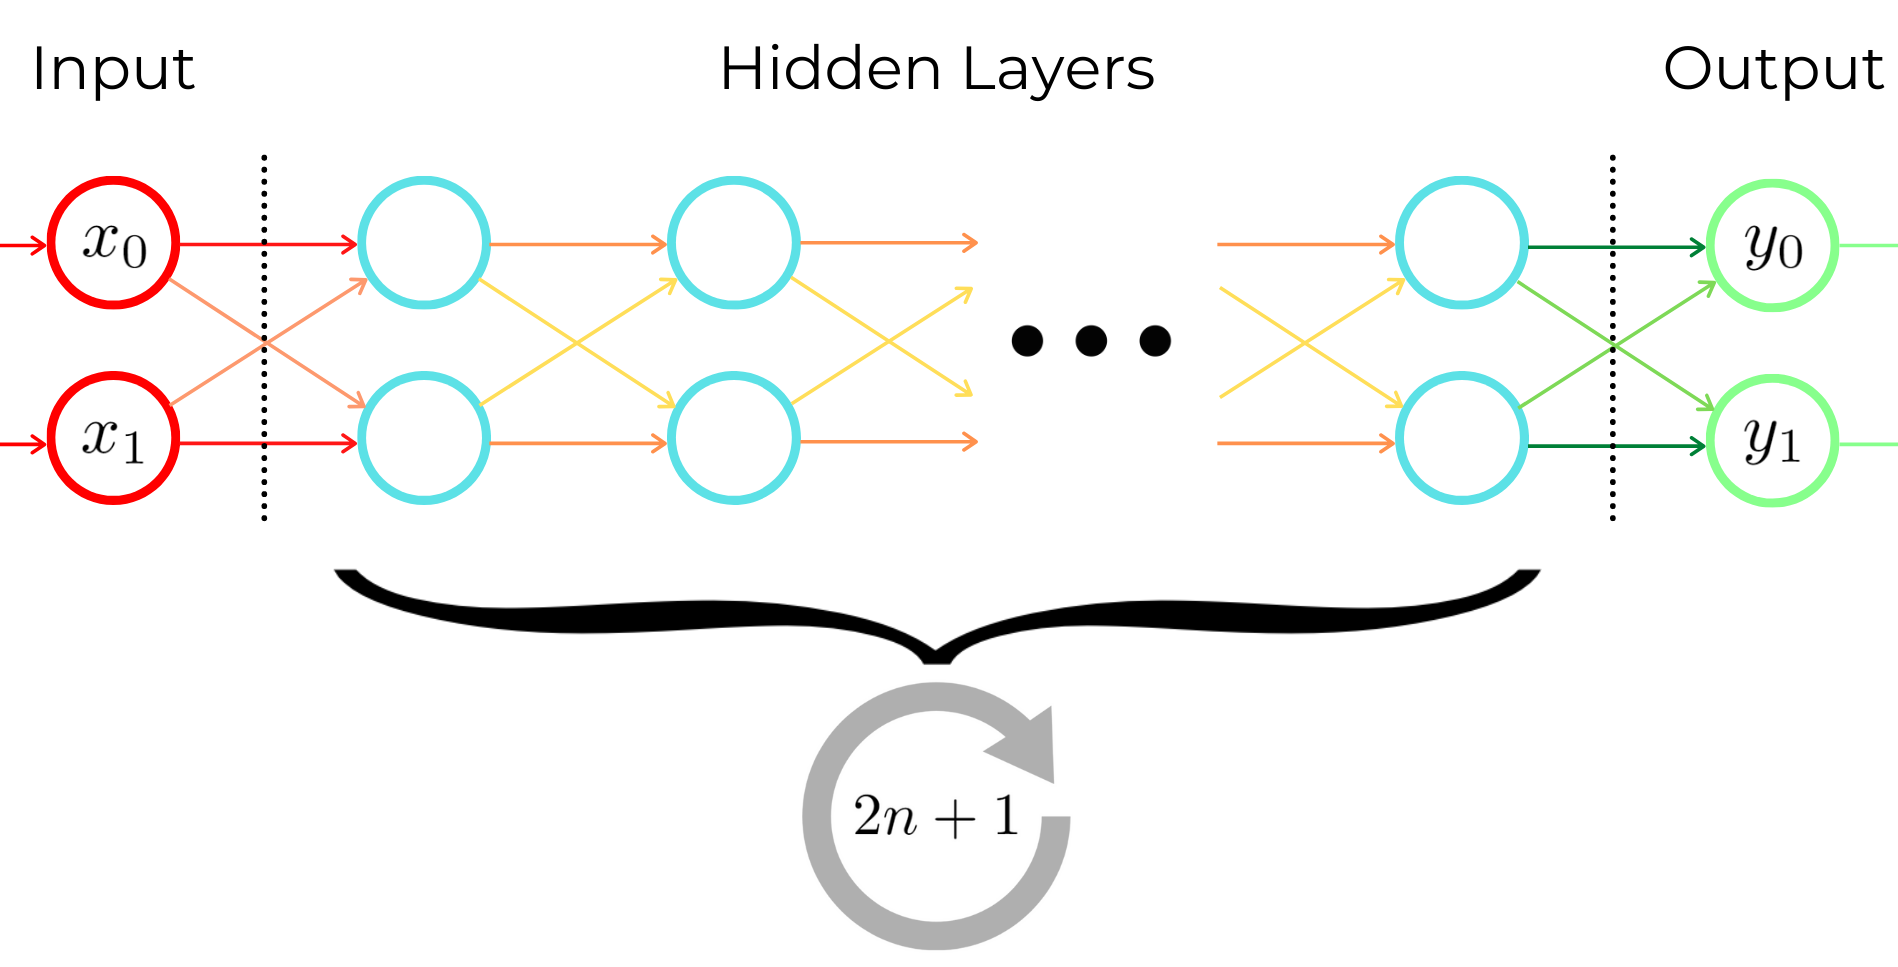

### Step 4: Create Training Data

Steps to creating data:

1. Randomize a 2-d real unit vectors, this is our training examples $X$ (for this purpose, ignore complex number)
2. Using the known correct matrix, take the product of the two, this is the predicted output value $\hat{y}$
3. Repeat the process $n$ times as deemed necessary

In [49]:
def create_data(size_off = 500, size_on = 500, train_split = 0.7, seed = 0):
    
    """
    
    Create two matrices of specified length consisting of 2-d vectors representing
    a train and a test examples
    
    Parameters
    ----------
    size_off: int
        Number of examples for when the cx gate is off and I is applied
    size_on: int
        Number of examples for when the cx gate is on and X is applied
    train_split: float
        Proportion of the train data to the total dataset
        
    
    Returns
    -------
    X_train: ndarray
        Matrix containing the x-values of all the training examples
    y_train: ndarray
        Matrix containing the y-values of all the training examples
    X_test: ndarray
        Matrix containing the x-values of all the testing examples
    y_test: ndarray
        Matrix containing the y-values of all the testing examples

    """
    
    size = size_off + size_on
    
    np.random.seed(seed)

    # Apply I (x_off serves as both input and output)
    x_off = np.random.rand(2, size_off)
    x_off /= np.linalg.norm(x_off, axis = 0)
    y_off = x_off

    # Apply X (x_on serves as input)
    x_on = np.random.rand(2, size_on)
    x_on /= np.linalg.norm(x_on, axis = 0)
    y_on = np.dot(X, x_on)

    # Combine two input and output sets
    X_es = np.concatenate((x_off, x_on), axis = 1)
    y_es = np.concatenate((y_off, y_on), axis = 1)

    '''    # Shuffle inputs and outputs
    a = np.arange(size)
    rand_list = np.random.choice(a, replace = False, size = size)
    X_es = X_es[:, rand_list]
    y_es = y_es[:, rand_list]'''
    
    # Splitting the matrix into its corresponding groups
    X_train = X_es[:, :int(size*train_split)]
    y_train = y_es[:, :int(size*train_split)]
    
    X_test = X_es[:, int(size*train_split):]
    y_test = y_es[:, int(size*train_split):]
    
    return X_train, y_train, X_test, y_test

### Step 5: Weights Initialization

We create a general function to intialize $n$ unitary matrices. There are two options:

   1. Create a set of random (2, 2) real matrices and apply Gram-Schmidt to get orthogonal matrices (unitary in R)
   2. Create a set of random angle parameters and run them through the U3 function to get complex unitary matrices
    
We are going with the second approach

In [584]:
def initialize(n = 3):
    
    """
    Parameters:
    -----------
    n: int
        Number of random U3 matrices
        
    Returns:
    --------
    W_list: list
        List of U3 matrices as ndarray
    
    """

    angle_list = np.random.uniform(low = 0, high = 2*np.pi, size = (n, None, 3))
    W_list = []

    for packet in angle_list:
        W = U3(*np.squeeze(packet))
        W_list.append(W)
        
    return W_list

### Step 6: Forward Propagation

Forward propagation passes the input into the neural network to predict an output value

$$\hat{y} = \underbrace{\begin{bmatrix} \alpha & \beta \\ \gamma & \delta \end{bmatrix}}_{W} \begin{pmatrix} x_0 \\ x_1 \end{pmatrix}$$

To run multiple training examples at the same time (stochastic), put the training examples into a matrix a multiply it with the weight matrix. The index of training examples will be represented by the superscript inside the parentheses.

$$W(x) \ = \ W \begin{pmatrix} x_0^{(0)} & x_0^{(1)} ... & \ x_0^{(n)} \\ x_1^{(0)} & x_1^{(1)} ... & \ x_1^{(n)} \end{pmatrix} \ = \ \begin{pmatrix} \hat{y}^{(0)} & \hat{y}^{(1)} & ... & \hat{y}^{(n)}\end{pmatrix}$$

Here we will only attempt to build the forward propagation function for our $n = 2$ examples. In the future, if the current architecture is promising, we will attempt to generalize the function.

There are two configurations of which forward propagation is applied on the 3 unitary matrices.

$$ABC = I \ \& \ AXBXC = X$$

In [51]:
def forward_prop(x, W_list, form):
    
    """
    
    Parameters:
    -----------
    x: ndarray (2, n)
        Matrix of x-values
    W_list: list
        List of unitary weights
    form: int
        Determine which form to apply (0: ABC, 1: AXBXC)
        
    """
    
    A, B, C = W_list
    
    if form == 0:
        W = mat_mul(A, B, C)
    else:
        W = mat_mul(A, X, B, X, C)

    y_hat = np.dot(W, x)

    return y_hat

### Step 7: Define Cost Function

However, since we are working with complex number, we will have to deal with the equivalence relation defined on global phase of the unitary matrix. Because of this, we choose the metrics on well-known quantum SWAP test, which can be implemented as followed.

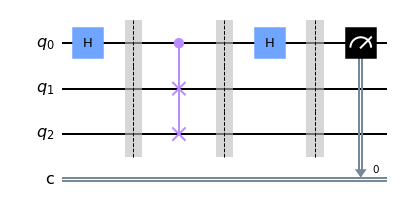

In [52]:
circ = q(3, 1)
# SWAP Test
circ.h(0)
circ.barrier()
circ.cswap(0, 1, 2)
circ.barrier()
circ.h(0)
circ.barrier()

# Measurement
circ.measure(0, 0)

milk(circ)

For the circuit above, we use barriers to denotes checkpoints.

Let's call the state in $q_1$, $\delta$ (delta) and $q_2$, $\psi$ (psi). We start with the initial state $|0, \delta, \psi\rangle$.

Recall that $\delta$ is the constant state and $\psi$ is the test state

At the first check point, we apply a Hadamard gate on the first qubit

$$H \ |0, \delta, \psi\rangle = \frac{1}{\sqrt{2}} \ (|0\rangle + |1\rangle) \ |\delta, \psi\rangle = \frac{1}{\sqrt{2}} \ (|0, \delta, \psi\rangle + |1, \delta, \psi \rangle)$$

At the second check point, we apply a control SWAP gate on all three qubits (control: $q_0$, targets: $q_1, q_2$)

$$\text{CSWAP} \frac{1}{\sqrt{2}} \ (|0, \delxta, \psi\rangle + |1, \delta, \psi \rangle) = \frac{1}{\sqrt{2}} \ (|0, \delta, \psi \rangle + \underbrace{|1, \psi, \delta \rangle)}_{\delta \text{ and } \psi \text{ is swapped}}$$

At the third check point, we apply another Hadamard on the first qubit on the

$$H \ \frac{1}{\sqrt{2}} \ (|0, \delta, \psi \rangle + |1, \psi, \delta \rangle) = \frac{1}{2} \ (|0, \delta, \psi \rangle + |1, \delta, \psi \rangle + |0, \psi, \delta \rangle - |1, \psi, \delta \rangle)$$

Because we know we want to measure the state $|0\rangle$, we can factor it out

$$\frac{1}{2} \ (|\delta, \psi \rangle + |\psi, \delta \rangle) \ |0\rangle + (|\delta, \psi \rangle - |\psi, \delta \rangle) \ |1\rangle$$

Now, to find to probability of measuring $|0\rangle$, we take the dot product of the amplitude

$$P(q_0 \searrow 0) = \frac{1}{2}(\langle\delta, \psi | + \langle \psi, \delta|) \ \frac{1}{2} \ (|\delta, \psi \rangle + |\psi, \delta \rangle)$$

$$ = \frac{1}{4} (\underbrace{\langle\delta, \psi \ | \ \delta, \psi \rangle}_{\text{cancel to } 1} + \langle\delta, \psi \ | \ \psi, \delta \rangle + \langle\psi, \delta \ | \ \delta, \psi \rangle + \underbrace{\langle\psi, \delta \ | \ \psi, \delta \rangle}_{\text{cancel to } 1})$$

$$ = \frac{1}{4} (1 + 1 + \underbrace{\langle\delta, \psi \ | \ \psi, \delta \rangle + \langle\psi, \delta \ | \ \delta, \psi \rangle}_{\text{dot product is commutative}})$$

Tensor product has the property

$$(A\otimes B) \cdot (C \otimes D) = (A \cdot C) \otimes (B \cdot D)$$

Which means that now

$$\langle\delta, \psi \ | \ \psi, \delta \rangle = \underbrace{\langle \delta \ | \ \psi \rangle \otimes \langle \psi \ | \ \delta \rangle}_{\text{dot product is commutative}} = | \ \langle \psi \ | \ \delta \rangle \ |^2$$

Therefore,

$$P(q_0 \searrow |0\rangle) = \frac{1}{2} \ (1 + |\langle \ \psi \ | \ \delta \ \rangle|^2)$$

When $\psi$ is identical to $\delta$, 

$$P(q_0 \searrow |0\rangle) = \frac{1}{2} \ (1 + |\langle \ \psi \ | \ \psi \ \rangle|^2) = \frac{1}{2} \ (1 + 1) = 1$$

We will get $|0\rangle$ with 100% probability

On the other hand, when $\psi$ is orthogonal to $\delta$,

$$P(q_0 \searrow |0\rangle) = \frac{1}{2} \ (1 + |\langle \ \psi \ | \ \psi \ \rangle|^2) = \frac{1}{2} \ (1 + 0) = \frac{1}{2}$$

We will get $|0\rangle$ with 50% probability

All other states will return probability of gettin $|0\rangle$ between 50% and 100%

For our purposes, we can defined a loss function that returns $0$ if two states are identical and $1$ if two states are orthogonal for input $x^{(i)}$. All other combinations return values between $0$ and $1$.

$$\mathscr{L}(W^{(i)}) = 1-|\langle \hat{y}^{(i)} | y^{(i)} \rangle|^2$$

We defined a cost function that averages over the loss of all the individual training examples.

$$J(W)  = \frac{1}{N} \sum^{N-1}_{i=0} \mathscr{L}(W^{(i)}) = \frac{1}{N} \sum^{N-1}_{i=0} 1 - |\langle \hat{y}^{(i)} | y^{(i)} \rangle|^2  = 1 - \frac{1}{N} \sum^{N-1}_{i=0}|\langle \hat{y}^{(i)} | y^{(i)} \rangle|^2$$

where $N$ is the number of training examples

In [489]:
def cost(y_hat, y):
    
    """
    
    Compute the cost function using the complex dot product
    
    Parameters
    ----------
    y: ndarray
        The true y value generated from a preset matrix (see step 4: Create Data)
    y_hat: ndarray
        The predicted y value from a learned set of weights (see step 6: Forward Propagation)
    
    Returns
    -------
    J: float
        Scalar matrix to indicate the overall performance of the current set of weights
    
    """
    
    J = 1 - np.mean(np.abs(np.sum(np.conj(y) * y_hat, axis = 0))**2)
    
    return J

### Step 8: Backpropagation

The forward progagation on one example from Step 7 gives us

$$\hat{y}_i = W_\gamma \cdot x_i = \begin{bmatrix} \alpha_0 & \alpha_1 \\ \beta_0 & \beta_1 \end{bmatrix} \begin{pmatrix} x_0 \\ x_1 \end{pmatrix} = \begin{pmatrix} \alpha_0 x_0 + \alpha_1 x_1 \\ \beta_0 x_0 + \beta_1 x_1 \end{pmatrix}$$

However, because $A, B, C, X$ are all elements of the group $U(2)$. We know that the product matrix of all these matrices is also a $U(2)$ matrix (from the closure property of group theory).

Thus,

$$\begin{bmatrix} \alpha_0 & \alpha_1 \\ \beta_0 & \beta_1 \end{bmatrix} \begin{pmatrix} x_0 \\ x_1 \end{pmatrix} = \begin{bmatrix} {\cos (\frac{\theta}{2})} & -e^{i \lambda}\sin \frac{\theta}{2} \\ e^{i \phi}\sin \frac{\theta}{2} & e^{i(\phi + \lambda)}\cos \frac{\theta}{2} \end{bmatrix} \begin{pmatrix} x_0 \\ x_1 \end{pmatrix}$$

$$= \begin{bmatrix}\cos (\frac{\theta}{2}) \cdot x_0 - e^{i\lambda}\sin (\frac{\theta}{2}) \cdot x_1 \\ e^{i \phi} \ [\sin(\frac{\theta}{2}) \cdot x_0 + e^{i\lambda}\cos(\frac{\theta}{2})\cdot x_1]\end{bmatrix}$$

To find the local minimum, update the parameters opposite of the direction of steepest descent. Backpropagation calculates derivative of the cost function with respect to each of the matrix parameters.

From above

$$J(W)  = \frac{1}{N} \sum^{N-1}_{i=0} 1 - |\langle \hat{y}^{(i)} | y^{(i)} \rangle|^2  = 1 - \frac{1}{N} \sum^{N-1}_{i=0}|\langle \hat{y}^{(i)} | y^{(i)} \rangle|^2$$

The cost function can be rewritten as 

$$\begin{align} J(W) &= 1 - \frac{1}{N} \sum^{N-1}_{i=0} \underbrace{|\overline{(\alpha_0 x_0 + \alpha_1 x_1)} \cdot y_0 + \overline{(\beta_0 x_0 + \beta_1 x_1)} \cdot y_1|^2}_{L(W)} \\ &= 1 - \frac{1}{N} \sum^{N-1}_{i=0} \big{|} \ \overline{ (\cos (\theta/2) \cdot x_0 - e^{i\lambda}\sin (\theta/2) \cdot x_1)} \cdot y_0 + \overline{e^{i \phi} \ [\sin(\theta/2) \cdot x_0 + e^{i\lambda}\cos(\theta/2)\cdot x_1]} \cdot y_1 \ \big{|}^{\ 2} \\ &= 1 - \frac{1}{N} \sum^{N-1}_{i=0} \big{|} \ (\cos (\theta/2) \cdot x_0 - e^{-i\lambda}\sin (\theta/2) \cdot x_1) \cdot y_0 + e^{-i \phi} \ [\sin(\theta/2) \cdot x_0 + e^{-i\lambda}\cos(\theta/2)\cdot x_1] \cdot y_1 \ \big{|}^{\ 2} \end{align}$$

Taking partial derivative with respect to the general parameters $w$

$$\begin{align} \frac{\partial}{\partial w}J(W) &= -\frac{1}{N} \sum^{N-1}_{i=0} \frac{\partial}{\partial w} |\langle \hat{y}^{(i)} | y^{(i)} \rangle|^2 \\ &= -\frac{2}{N} \sum^{N-1}_{i=0}\langle \hat{y}^{(i)} | y^{(i)} \rangle \cdot \frac{\partial}{\partial w} \langle \hat{y}^{(i)} | y^{(i)} \rangle \end{align}$$ 

With

$$\langle \hat{y}^{(i)} | y^{(i)} \rangle = [\cos (\theta/2) \cdot x_0 - e^{-i\lambda}\sin (\theta/2) \cdot x_1] \cdot y_0 + e^{-i \phi} \ [\sin(\theta/2) \cdot x_0 + e^{-i\lambda}\cos(\theta/2)\cdot x_1] \cdot y_1$$

For each of the matrix parameters ($\theta, \phi, \lambda$), we get

$$\begin{align} \frac{\partial}{\partial \theta} \langle \hat{y}^{(i)} | y^{(i)} \rangle &= -\frac{1}{2} \big{(} \sin(\theta/2)\cdot x_0y_0 + e^{-i \lambda} \cos(\theta/2)\cdot x_1y_0 - e^{-i\phi}\cos({\theta/2})\cdot x_0y_1 + e^{-i (\phi + \lambda)} \sin(\theta/2)\cdot x_1y_1\big{)} \\\\ \frac{\partial}{\partial \phi} \langle \hat{y}^{(i)} | y^{(i)} \rangle &= -i e^{-i\phi} \ [\sin(\theta/2) \cdot x_0 + e^{-i\lambda}\cos(\theta/2)\cdot x_1] \cdot y_1 \\\\ \frac{\partial}{\partial \lambda} \langle \hat{y}^{(i)} | y^{(i)} \rangle &= i e^{-i\lambda} \ [\sin(\theta/2)\cdot y_0 - \cos(\theta/2)\cdot y_1]\cdot x_1\end{align}$$